In [1]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.16.0.post0

In [2]:
import numpy as np

In [3]:
import math

In [120]:
A = np.array([[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0]])
A, A@A, A@A@A, A@A@A@A, A + A@A + A@A@A + A@A@A@A 

(array([[0, 0, 1, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0]]),
 array([[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 0, 0, 0]]),
 array([[0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 0, 1, 0]]),
 array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]]),
 array([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]))

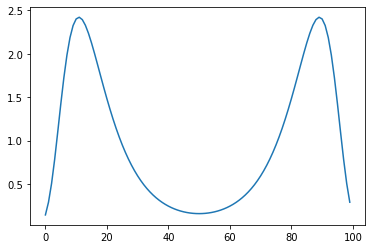

In [546]:
plt.plot(pdf_after_trans(monotonic_trans_inv(np.arange(-.5, .5, .01))))


(array([ 1.,  0.,  1.,  0.,  3.,  4.,  7.,  5.,  5.,  8.,  5.,  5.,  7.,
         7.,  6.,  6.,  9.,  9., 11., 11., 14., 14., 16., 12., 16.,  7.,
        16., 11., 15., 16.,  9., 13., 16., 14.,  7.,  5., 11.,  7., 13.,
         7.,  9.,  3.,  8.,  5.,  8.,  4.,  6.,  4.,  7.,  9.,  7.,  3.,
         3.,  3.,  3.,  4.,  2.,  1.,  5.,  2.,  4.,  4.,  4.,  6.,  3.,
         1.,  4.,  4.,  2.,  1.,  2.,  3.,  1.,  2.,  3.,  2.,  0.,  2.,
         1.,  2.,  1.,  1.,  2.,  0.,  4.,  2.,  0.,  0.,  0.,  1.,  1.,
         0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  3.,  1.,  2.,  0.,
         2.,  0.,  1.,  0.,  2.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
         0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  2.,
         1.,  1.,  0.,  2.,  2.,  3.,  0.,  6.,  2.,  3.,  1.,  3.,  2.,
         2.,  3.,  2.,  1.,  3.,  6.,  3.,  4.,  3.,  4.,  5.,  7.,  5.,
         4.,  2.,  6.,  7., 13., 14.,  7.,  4.,  8., 18., 11.,  3.,  5.,
         9.,  8.,  8., 14., 16., 13.,  7., 10., 11.

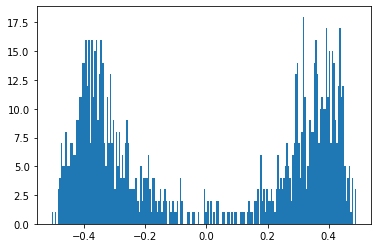

In [553]:
plt.hist(monotonic_trans(np.random.randn(1000)), bins=200)

In [618]:
1/np.sqrt(2*math.pi) * np.exp(0)

0.3989422804014327

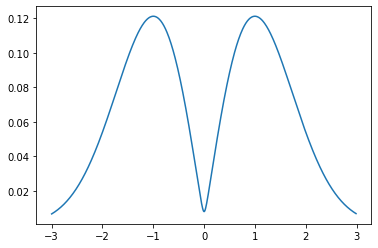

In [540]:
def monotonic_trans(x):
    return np.arcsinh(25*x)/10 #+ .5

def monotonic_trans_inv(x):
    return np.sinh(10*(x ))/25

def pdf_after_trans(x):
    return 1/(25/10 *1/(np.sqrt(1+(25*x)**2))) * (1/np.sqrt(2*math.pi)) * np.exp(-.5*x ** 2)
plt.plot(np.arange(-3., 3., .01), pdf_after_trans(np.arange(-3., 3., .01)) * 0.05)

In [641]:
%%manim -qm CircleToSquare


    
class CircleToSquare(MovingCameraScene):
    CONFIG = {
        "y_max" : 50,
        "y_min" : 0,
        "x_max" : 7,
        "x_min" : 0,
        "y_tick_frequency" : 5, 
        "x_tick_frequency" : 0.5, 
    }
    # Setup the scenes
    def setup(self):            
        MovingCameraScene.setup(self)
        
    def construct(self):
        ax = Axes( x_range=[-3. , 3., 1.], y_range=[-.5 , .5, .25])
        self.play(Create(ax), run_time=2.)

        t = MathTex(r"z \sim \mathcal{N}(0, 1)", color=BLUE)
        t.next_to(ax, UR, coor_mask=[0.5, 0.5, 0])

        graph = ax.plot(lambda x: 1/np.sqrt(2*math.pi) * np.exp(-x ** 2), x_range=[-3 , 3], use_smoothing=False, color=BLUE)
        ax.insert(1, graph)
        self.play(*[Create(graph), Create(t)], run_time=2.)
        self.wait(5)


        t_red = MathTex(r"f(z) = \frac{1}{10}arcsinh(25z)", color=WHITE)
        t_red.next_to(ax, UL, coor_mask=[0.5, 0.5, 0])
        graph_mon = ax.plot(monotonic_trans, x_range=[-3 , 3], use_smoothing=True, stroke_color=WHITE)
        ax.insert(1, graph_mon)
        self.play(*[Create(graph_mon), Create(t_red)], run_time=2.)

        self.wait(5)


        origin = ax.get_origin()
        y_scale = ax.get_y_unit_size()
        r = np.random
        x_length = ax.coords_to_point(0., 1.)[1] - ax.coords_to_point(0., 0)[1]
        y_length = ax.coords_to_point(.9, 1.)[0] - ax.coords_to_point(0., 0)[0]

        ## Sample the first point
        all_y = np.array([])
        x = r.randn()
        y = monotonic_trans(x)
        all_y = np.append(all_y, y)
        dot = Dot(ax.coords_to_point(x, 0), color=BLUE)

        self.play(Create(dot), run_time=2.)
        self.play(dot.animate.move_to(ax.coords_to_point(x, y)).set_color(WHITE), run_time=2.)

        self.wait(3)

        bin_count, _ = np.histogram(all_y, bins=np.arange(-.5, .55, .05))

        chart = BarChart(bin_count/20., x_length=x_length, y_range=[0., .15, .05]).move_to([-.85, 1.57, 0.])
        all_objects = Group(*[graph, graph_mon, ax, dot, t, t_red])
        self.play(all_objects.animate.rotate(-PI/2), t.animate.rotate(0).move_to([4.75, 4.5, 0.]), t_red.animate.rotate(0).move_to([6., 5.5, 0.]))
        self.play(self.camera.frame.animate.set(width=25))
        t_red_bis = MathTex(r"x = f(z) \sim p_z(f^{-1})(x)) |J_f(f^{-1})(x))|", color=RED).move_to([7.5, 3.5, 0.])
        self.play(dot.animate.move_to(ax.coords_to_point(0., y)).set_color(RED), Create(t_red_bis))
        self.play(Create(chart), FadeOut(dot))
        self.play(graph.animate.move_to(ax.coords_to_point(0., -1.2)))
        self.remove(ax)
        all_objects = Group(*[all_objects, t_red_bis, chart])

        self.play(all_objects.animate.move_to([0. , 0., 0.]))

        #plot_new = chart.plot(lambda x: pdf_after_trans(monotonic_trans_inv(x/20. - .5)) * 0.05, x_range=[0. , 20.], use_smoothing=True, stroke_color=BLUE)
        #self.play(Create(plot_new))
        
        #self.play(camera.frame.animate.set(width=50))
        for j in range(10):
            dots = []
            positions_intermediate = []
            positions_final = []
            for i in range(50):
                x = r.randn()
                y = monotonic_trans(x)
                all_y = np.append(all_y, y)
                dot = Dot(ax.coords_to_point(x, -1.5), color=BLUE)
                ax.insert(0, dot)
                dots.append(dot)
                positions_intermediate.append([x, monotonic_trans(x)])
                positions_final.append([0., monotonic_trans(x)])

            self.play(*[Create(dot) for dot in dots], run_time=1.)
            self.play(*[dot.animate.move_to(ax.coords_to_point(pos[0], pos[1])).set_color(WHITE)
                        for dot, pos in zip(dots, positions_intermediate)], run_time=1.)
            self.play(*[dot.animate.move_to(ax.coords_to_point(pos[0], pos[1])).set_color(RED)
                        for dot, pos in zip(dots, positions_final)], run_time=1.)
            self.play(*[FadeOut(dot) for dot in dots], run_time=1.)

            bin_count, _ = np.histogram(all_y, bins=np.arange(-.5, .55, .05))
            self.play(chart.animate.change_bar_values(bin_count/bin_count.sum(), update_colors=True))

            if j == 0:
                plot_new = chart.plot(lambda x: pdf_after_trans(monotonic_trans_inv(x/20. - .5)) * 0.05, x_range=[0. , 20.], use_smoothing=True, stroke_color=RED)
                self.play(Create(plot_new))
                #self.play(self.camera.frame.animate.set(width=22))

        self.wait(10)
        #t.arrange(DOWN, center=False, aligned_edge=LEFT)  
        #self.add(t)
        #self.play(Create(t))
        #self.play(Transform(blue_circle, green_square))
        #self.wait()

In [628]:
from scipy.special import erf

In [417]:
erf(1.)

0.8427007929497148

In [ ]:
def int_gaussian():
    

In [596]:
%%manim -qm UMNN

class UMNN(MovingCameraScene):
    def setup(self):
        MovingCameraScene.setup(self)

    def construct(self):
        edges = []
        partitions = []
        c = 0
        layers = [1, 2, 3, 3, 2, 1]  # the number of neurons in each layer

        for i in layers:
            partitions.append(list(range(c + 1, c + i + 1)))
            c += i
        for i, v in enumerate(layers[1:]):
                last = sum(layers[:i+1])
                for j in range(v):
                    for k in range(last - layers[i], last):
                        edges.append((k + 1, j + last + 1))

        vertices = np.arange(1, sum(layers) + 1)

        graph = Graph(
            vertices,
            edges,
            layout='partite',
            partitions=partitions,
            layout_scale=3,
            vertex_config={'radius': 0.20},
        )

        t = MathTex(r"g_{\theta}(x) := \frac{\partial f(x)}{\partial x}", color=BLUE)
        t.next_to(graph, UP, coor_mask=[0.5, 1., 0])
        graph.insert(0, t)

        self.play(Create(graph), run_time=5.)

        cur_layer = 0
        cur_sum = 0
        cur_nodes = []
        prev_nodes = []
        if False:
            for ind, v in enumerate(graph.vertices):
                if cur_sum == layers[cur_layer]:
                    cur_sum = 0
                    cur_layer += 1
                    anim = [n.animate.set_color(RED) for n in cur_nodes] + [n.animate.set_color(WHITE) for n in prev_nodes]
                    self.play(*anim, )
                    prev_nodes = cur_nodes
                    cur_nodes = []

                cur_sum += 1
                cur_nodes.append(graph.vertices[v])

            anim = [n.animate.set_color(RED) for n in cur_nodes] + [n.animate.set_color(WHITE) for n in prev_nodes]
            self.play(*anim)

        ax = Axes( x_range=[-2. , 2., .5], y_range=[0. , 1., .5]).scale(.4).next_to(graph, UR, [-1., -1.5, 0.])
        self.play(Create(ax), run_time=5.)

        plot = ax.plot(lambda x: x**2 /3., x_range=[-1.5 , 1.5], use_smoothing=False, color=BLUE)
        self.play(Create(plot), run_time=5.)

        self.play(self.camera.frame.animate.set(width=26))

        text = Tex("Integrand")
        Create(text.next_to(t, UL, [.5, .5, 0.]))
        derivative_group = Group(*[graph, ax, plot, t, text])
        self.play(derivative_group.animate.move_to([0. , 0., 0.]))
        rectangle_derivative = SurroundingRectangle(derivative_group, color=BLUE, buff=.5)
        self.play(Create(rectangle_derivative))
        
        self.wait(5)

        ax_bis = Axes(x_range=[-2. , 2., .5], y_range=[-1.5 , 1.5, .5]).scale(.6).next_to(rectangle_derivative, LEFT, [1., 0., 0.])

        self.play(Create(ax_bis), self.camera.frame.animate.set(width=28))
        
        
        t = MathTex(r"\partial f(x) = \int_{-\infty}^{x} g_{\theta}(t) dt", color=YELLOW).next_to(ax_bis, UP, [0., 1., 0.])
        self.play(Create(t))

        

        text = Tex("UMNN")
        self.wait(1)
        all_obj = [ax_bis, t, derivative_group, text, rectangle_derivative]
        umnn_group = Group(*all_obj)
        
        self.play(umnn_group.animate.move_to([0. , 0., 0.]))

        
        self.play(Create(text.next_to(t, UL, [.5, .5, 0.])))
        
        rectangle_umnn = SurroundingRectangle(umnn_group, buff=.4)
        self.play(Create(rectangle_umnn))
        
        decimal = DecimalNumber(0, num_decimal_places=3, include_sign=True, unit=None).move_to(ax_bis.coords_to_point(2., 2.))
        
        decimal.add_updater(lambda d: d.set_value(tracker.get_value()))
        self.add(decimal)
        
        tracker = ValueTracker(-1.5)
        cur_area = ax.get_area(graph=plot, x_range=(-1.5, tracker.get_value()), color=YELLOW)
        plot_bis = ax_bis.plot(lambda x: x**3/4, x_range=[-1.5 , tracker.get_value()], use_smoothing=False, color=YELLOW)
        
        all_plots = [plot_bis]
        all_area = [cur_area]
        def update_graph(mob):
            cur_area = mob.get_area(graph=plot, x_range=(-1.5, tracker.get_value()), color=YELLOW)
            plot_bis = ax_bis.plot(lambda x: x**3/4, x_range=[-1.5 , tracker.get_value()], use_smoothing=False, color=YELLOW)
            self.add(cur_area)
            self.add(plot_bis)
            for a in all_plots.pop():
                self.remove(a)
            all_plots.append(plot_bis)
            for a in all_area.pop():
                self.remove(a)
            all_area.append(cur_area)

        #update_graph(ax)
        ax.add_updater(update_graph)
        
        self.play(tracker.animate.set_value(float(1.5)), run_time=3)
        self.wait(1)
        self.wait(10)
        

/Users/awehenkel/miniconda3/envs/DAG-NF/lib/python3.8/site-packages/manim/mobject/graph.py:544: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  k: v for k, v in vertex_config.items() if k not in vertices


In [794]:
%%manim -qm CircleToSquare


    
class CircleToSquare(MovingCameraScene):
    CONFIG = {
        "x_min": 0,
        "x_max": 50,
        "y_min": 0,
        "y_max": 30,
        "graph_origin": 1 * DOWN + 2 * LEFT,
    }
    # Setup the scenes
    def setup(self):            
        MovingCameraScene.setup(self)
        
    def construct(self):
        rand = np.random
        def movement_equation (x, x_0, dx_0, F):
            x = x #+ rand.randn() * .01
            delta_origin = (x_0[0] - x)
            if F[0] == 0:
                t = (x-x_0[0])/dx_0[0]
            elif delta_origin == 0:
                return x_0[1]
            else:
                delta = dx_0[0]**2 - 2*F[0]*delta_origin
                t1 = (-dx_0[0] + np.sqrt(delta))/F[0]
                t2 = (-dx_0[0] - np.sqrt(delta))/F[0]
                t = t1
            y =  x_0[1] + dx_0[1] * t + .5 * t**2 * F[1]
            return y #+ rand.randn() * .1
        
        ax = Axes(x_range=[-1. , 10, 2.5], y_range=[0. , 15, 3])#.scale(.4).next_to(graph, UR, [-1., -1.5, 0.])
        self.play(Create(ax))
        for i in range(5):
            x_0 = np.array([0, 1.5])
            dx_0 = np.array([2. + rand.randn() * .5, 13 + rand.randn()*2])
            F = np.array([rand.randn() * .1, -9.81])

            y = 0
            delta = dx_0[1]**2 - 2*F[1]*x_0[1]
            t_max = (-dx_0[1] - np.sqrt(delta))/F[1]
            x_max = .5*F[0]*t_max**2 + dx_0[0] * t_max
            x_max_half = .5*F[0]*t_max**2/4 + dx_0[0] * t_max/2.

            # Define the cubic graph
            CubicGraph = ax.plot(lambda x: movement_equation(x, x_0, dx_0, F), x_range=[0, x_max_half] , color=WHITE, stroke_width=2)
            ball = Dot()
            self.play(MoveAlongPath(ball, CubicGraph), Create(CubicGraph), run_time=3)
            self.remove(ball)

            last_x = np.array([x_max_half, movement_equation (x_max_half, x_0, dx_0, F)])
            last_dx = dx_0 + t_max*F/2

            last_dx_1 = last_dx + rand.randn(2) * .5
            y = 0
            delta = last_dx_1[1]**2 - 2*F[1]*last_x[1]
            t_max = (-last_dx_1[1] - np.sqrt(delta))/F[1]
            x_max = .5*F[0]*t_max**2 + last_dx_1[0] * t_max + x_max_half
            DashedCubicGraph_1 = DashedVMobject(ax.plot(lambda x: movement_equation(x, last_x, last_dx_1, F), x_range=[x_max_half, x_max] , color=BLUE, stroke_width=2))       
            self.play(Create(DashedCubicGraph_1))

            last_dx_2 = last_dx + rand.randn(2) * .5
            y = 0
            delta = last_dx_2[1]**2 - 2*F[1]*last_x[1]
            t_max = (-last_dx_2[1] - np.sqrt(delta))/F[1]
            x_max = .5*F[0]*t_max**2 + last_dx_2[0] * t_max + x_max_half
            DashedCubicGraph_2 = DashedVMobject(ax.plot(lambda x: movement_equation(x, last_x, last_dx_2, F ), x_range=[x_max_half, x_max] , color=YELLOW, stroke_width=2))       
            self.play(Create(DashedCubicGraph_2))

            last_dx_3 = last_dx + rand.randn(2) * .5
            y = 0
            delta = last_dx_3[1]**2 - 2*F[1]*last_x[1]
            t_max = (-last_dx_3[1] - np.sqrt(delta))/F[1]
            x_max = .5*F[0]*t_max**2 + last_dx_3[0] * t_max + x_max_half
            DashedCubicGraph_3 = DashedVMobject(ax.plot(lambda x: movement_equation(x, last_x, last_dx_3, F), x_range=[x_max_half, x_max] , color=GREEN, stroke_width=2))       
            self.play(Create(DashedCubicGraph_3))
            self.wait(1)

            delta = dx_0[1]**2 - 2*F[1]*x_0[1]
            t_max = (-dx_0[1] - np.sqrt(delta))/F[1]
            x_max = .5*F[0]*t_max**2 + dx_0[0] * t_max
            DashedCubicGraph_4 = ax.plot(lambda x: movement_equation(x, last_x, last_dx, F), x_range=[x_max_half, x_max] , color=WHITE, stroke_width=2)       
            ball = Dot()
            self.play(MoveAlongPath(ball, DashedCubicGraph_4), Create(DashedCubicGraph_4), run_time=3)
            self.wait(5)
            #return
            self.remove(CubicGraph)
            self.remove(DashedCubicGraph_1)
            self.remove(DashedCubicGraph_2)
            self.remove(DashedCubicGraph_3)
            self.remove(DashedCubicGraph_4)
        return
        # Initialize the left limit using the equation of cubic graph
        x_1 = -0.3
        y_1 = x_1
        LeftLimitLocation = ax.coords_to_point(x_1,y_1) # coordinates (-0.3, 0.603)
        LeftLimit = Dot(LeftLimitLocation, color=YELLOW)
        
        # Initialize the right limit to be at the left limit
        RightLimit = Dot(LeftLimitLocation, color=YELLOW)

        # Add updater to right limit
        def update_text(obj):
            obj.next_to(RightLimit, RIGHT, buff=SMALL_BUFF)

        # Define a highlighted portion of the cubic graph
        LengthOfArc = ax.plot(
            lambda x: x, color=YELLOW, x_range=[-0.3, 2.2])

        # Animate
        self.play(Create(CubicGraph))
        self.play(Create(LengthOfArc), MoveAlongPath(RightLimit, LengthOfArc), run_time=2)
        self.wait(3)

    


In [40]:
np.arange(3, 8.25, .25)

array([3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ,
       5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ])

In [55]:
%%manim -qm CircleToSquare

    
class CircleToSquare(MovingCameraScene):
    CONFIG = {
        "x_min": 0,
        "x_max": 50,
        "y_min": 0,
        "y_max": 30,
        "graph_origin": 1 * DOWN + 2 * LEFT,
    }
    # Setup the scenes
    def setup(self):            
        MovingCameraScene.setup(self)
        
    def construct(self):
        rand = np.random
        def movement_equation (x, x_0, dx_0, F):
            x = x #+ rand.randn() * .01
            delta_origin = (x_0[0] - x)
            if F[0] == 0:
                t = (x-x_0[0])/dx_0[0]
            elif delta_origin == 0:
                return x_0[1]
            else:
                delta = dx_0[0]**2 - 2*F[0]*delta_origin
                t1 = (-dx_0[0] + np.sqrt(delta))/F[0]
                t2 = (-dx_0[0] - np.sqrt(delta))/F[0]
                t = t1
            y =  x_0[1] + dx_0[1] * t + .5 * t**2 * F[1]
            return y #+ rand.randn() * .1
        
        ax = Axes(x_range=[-1. , 10, 2.5], y_range=[0. , 15, 3])#.scale(.4).next_to(graph, UR, [-1., -1.5, 0.])
        self.play(Create(ax))
        
        x_0 = np.array([0, 1.5])
        dx_0 = np.array([2., 13])
        F = np.array([rand.randn() * .1, -9.81])
        
        y = 0
        delta = dx_0[1]**2 - 2*F[1]*x_0[1]
        t_max = (-dx_0[1] - np.sqrt(delta))/F[1]
        x_max = .5*F[0]*t_max**2 + dx_0[0] * t_max
        x_max_half = .5*F[0]*t_max**2/4 + dx_0[0] * t_max/2.

        # Define the cubic graph
        CubicGraph = ax.plot(lambda x: movement_equation(x, x_0, dx_0, F), x_range=[0, x_max_half] , color=WHITE, stroke_width=2)
        ball = Dot()
        self.play(MoveAlongPath(ball, CubicGraph), Create(CubicGraph), run_time=3)
        self.remove(ball)
        

        last_x = np.array([x_max_half, movement_equation (x_max_half, x_0, dx_0, F)])
        last_dx = dx_0 + t_max*F/2
        all_y = []
        all_plots = []
        for i in range(3):       
            last_dx_1 = last_dx + rand.randn(2) * .5
            y = 0
            delta = last_dx_1[1]**2 - 2*F[1]*last_x[1]
            t_max = (-last_dx_1[1] - np.sqrt(delta))/F[1]
            x_max = .5*F[0]*t_max**2 + last_dx_1[0] * t_max + x_max_half
            DashedCubicGraph_1 = DashedVMobject(ax.plot(lambda x: movement_equation(x, last_x, last_dx_1, F), x_range=[x_max_half, x_max] , color=BLUE, stroke_width=2))       
            self.play(Create(DashedCubicGraph_1), run_time=.5)
            all_y.append(x_max)
            all_plots.append(DashedCubicGraph_1)

        x_length = ax.coords_to_point(8., 0.)[0] - ax.coords_to_point(3., 0)[0]
        bin_count, _ = np.histogram(np.array(all_y), bins=np.arange(3, 8.25, .25))
        chart = BarChart(bin_count/10., 
                         x_length=x_length, 
                         y_range=[0., .25, .05],
                        tips=False).move_to([ax.coords_to_point(2.615, 0.)[0] + x_length/2, 
                                                          ax.coords_to_point(4.1, 5.01)[1], 0.])
        chart.get_axes().set_opacity(0.)
        self.play(Create(chart), *[FadeOut(plot) for plot in all_plots])
        
                    
        text = MathTex("[x_{t+}, \dot x_{t+}] \sim p(x_{t+}, \dot x_{t+} | x_{t-})", 
                       color=BLUE).move_to(ax.coords_to_point(5.5, 14))

        self.play(Create(text))
        #return
        for j in range(5):
            graphs = []
            dots = []
            for i in range(15):       
                last_dx_1 = last_dx + rand.randn(2) * .5
                y = 0
                delta = last_dx_1[1]**2 - 2*F[1]*last_x[1]
                t_max = (-last_dx_1[1] - np.sqrt(delta))/F[1]
                x_max = .5*F[0]*t_max**2 + last_dx_1[0] * t_max + x_max_half
                DashedCubicGraph_1 = DashedVMobject(ax.plot(lambda x: movement_equation(x, last_x, last_dx_1, F), x_range=[x_max_half, x_max] , color=BLUE, stroke_width=2))       
                graphs.append(DashedCubicGraph_1)
                ball = Dot()
                dots.append(ball)
                all_y.append(x_max)

            all_anim = [Create(graph) for graph in graphs] #+ [MoveAlongPath(ball, graph) for ball, graph in zip(dots, graphs)]
            self.play(*all_anim)
            self.wait(1)
            
            bin_count, _ = np.histogram(np.array(all_y), bins=np.arange(3, 8.25, .25))
            self.play(chart.animate.change_bar_values(bin_count/bin_count.sum(), update_colors=True))
            
            all_anim = [FadeOut(graph) for graph in graphs]
            self.play(*all_anim)
            
            return


        delta = dx_0[1]**2 - 2*F[1]*x_0[1]
        t_max = (-dx_0[1] - np.sqrt(delta))/F[1]
        x_max = .5*F[0]*t_max**2 + dx_0[0] * t_max
        last_x = np.array([x_max_half, movement_equation (x_max_half, x_0, dx_0, F)])
        last_dx = dx_0 + t_max*F/2
        DashedCubicGraph_4 = ax.plot(lambda x: movement_equation(x, last_x, last_dx, F), x_range=[x_max_half, x_max] , color=WHITE, stroke_width=2)       
        ball = Dot()
        self.play(MoveAlongPath(ball, DashedCubicGraph_4), Create(DashedCubicGraph_4), run_time=3)
        self.wait(5)
            #return
            #self.remove(CubicGraph)
            #self.remove(DashedCubicGraph_1)
            #self.remove(DashedCubicGraph_2)
            #self.remove(DashedCubicGraph_3)
            #self.remove(DashedCubicGraph_4)
        return

In [668]:
movement_equation(10, [0, 0], [1, 2], [0, -9.81])

0.24905000000000002

In [57]:
%%manim -qm CircleToSquare

class CircleToSquare(MovingCameraScene):
    CONFIG = {
        "x_min": 0,
        "x_max": 50,
        "y_min": 0,
        "y_max": 30,
        "graph_origin": 1 * DOWN + 2 * LEFT,
    }
    # Setup the scenes
    def setup(self):            
        MovingCameraScene.setup(self)
        
    def construct(self):
        rand = np.random
        edges = []
        partitions = []
        c = 0
        layers = [1, 2, 3, 3, 2, 1]  # the number of neurons in each layer

        for i in layers:
            partitions.append(list(range(c + 1, c + i + 1)))
            c += i
        for i, v in enumerate(layers[1:]):
                last = sum(layers[:i+1])
                for j in range(v):
                    for k in range(last - layers[i], last):
                        edges.append((k + 1, j + last + 1))

        vertices = np.arange(1, sum(layers) + 1)

        graph = Graph(
            vertices,
            edges,
            layout='partite',
            partitions=partitions,
            layout_scale=3,
            vertex_config={'radius': 0.20},
        )

        t = MathTex(r"g_{\theta}(x) := \frac{\partial f(x)}{\partial x}", color=BLUE)
        t.next_to(graph, UP, coor_mask=[0.5, 1., 0])
        graph.insert(0, t)

        self.play(Create(graph), run_time=5.)

        cur_layer = 0
        cur_sum = 0
        cur_nodes = []
        prev_nodes = []
        if False:
            for ind, v in enumerate(graph.vertices):
                if cur_sum == layers[cur_layer]:
                    cur_sum = 0
                    cur_layer += 1
                    anim = [n.animate.set_color(RED) for n in cur_nodes] + [n.animate.set_color(WHITE) for n in prev_nodes]
                    self.play(*anim, )
                    prev_nodes = cur_nodes
                    cur_nodes = []

                cur_sum += 1
                cur_nodes.append(graph.vertices[v])

            anim = [n.animate.set_color(RED) for n in cur_nodes] + [n.animate.set_color(WHITE) for n in prev_nodes]
            self.play(*anim)

/Users/awehenkel/miniconda3/envs/DAG-NF/lib/python3.8/site-packages/manim/mobject/graph.py:544: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  k: v for k, v in vertex_config.items() if k not in vertices


In [118]:
%%manim -ql CircleToSquare


def affine_trans(a, b):
    return lambda x: a * x + b

    
class CircleToSquare(MovingCameraScene):
    CONFIG = {
        "y_max" : 50,
        "y_min" : 0,
        "x_max" : 7,
        "x_min" : 0,
        "y_tick_frequency" : 5, 
        "x_tick_frequency" : 0.5, 
    }
    # Setup the scenes
    def setup(self):            
        MovingCameraScene.setup(self)
        
    def construct(self):
        ax = Axes( x_range=[-3. , 3., 1.], y_range=[-3., 3., 1.])
        self.play(Create(ax), run_time=2.)
        
        t_red = MathTex(r"f(z) = a z + b", color=WHITE).move_to(ax.coords_to_point(-1., 3.))
        t_red.next_to(ax, UL, coor_mask=[0.5, 0.5, 0])
                
        a = MathTex("a: ").next_to(t_red, DOWN)
        tracker_a = ValueTracker(1.)
        decimal_a = DecimalNumber(0, num_decimal_places=2, include_sign=True, unit=None).next_to(a, RIGHT)
        decimal_a.add_updater(lambda d: d.set_value(tracker_a.get_value()))
        self.add(decimal_a)
        self.add(a)
        self.play(Create(a))
        
        b = MathTex("b: ").next_to(a, DOWN)
        tracker_b = ValueTracker(0.)
        decimal_b = DecimalNumber(0, num_decimal_places=2, include_sign=True, unit=None).next_to(b, RIGHT)
        decimal_b.add_updater(lambda d: d.set_value(tracker_b.get_value()))
        self.add(decimal_b)
        self.add(b)
        self.play(Create(b))
        
        
        graph_mon = ax.plot(affine_trans(tracker_a.get_value(), tracker_b.get_value()), x_range=[-3 , 3], use_smoothing=True, stroke_color=WHITE)
        ax.insert(1, graph_mon)
        self.play(*[Create(graph_mon), Create(t_red)], run_time=2.)
    
        
        self.wait(1)

        def update_graph(mob):
            new_graph = ax.plot(affine_trans(tracker_a.get_value(), tracker_b.get_value()), x_range=[-3 , 3], use_smoothing=True, stroke_color=WHITE)
            mob.become(new_graph)

        #update_graph(ax)
        graph_mon.add_updater(update_graph)
        self.play(a.animate.set_color(RED))
        self.play(tracker_a.animate.set_value(float(2.)), run_time=2)
        self.play(tracker_a.animate.set_value(float(-2)), run_time=2)
        self.play(tracker_a.animate.set_value(float(.5)), run_time=1)
        self.play(a.animate.set_color(WHITE))
        self.play(b.animate.set_color(RED))
        self.play(tracker_b.animate.set_value(float(2.)), run_time=2)
        self.play(tracker_b.animate.set_value(float(-2)), run_time=2)
        self.play(tracker_b.animate.set_value(float(-.75)), run_time=1)
        self.play(b.animate.set_color(WHITE))
        
        ax_gaussian = Axes(x_range=[-3. , 3., 1.], y_range=[0., 1., 1.])
        ax_gaussian.set_opacity(0.).move_to(ax.coords_to_point(0., -.75))
        
        t = MathTex(r"z \sim \mathcal{N}(0, 1)", color=BLUE)
        t.next_to(ax_gaussian, UR, coor_mask=[0.5, -.5, 0])

        graph = ax_gaussian.plot(lambda x: 1/np.sqrt(2*math.pi) * np.exp(-x ** 2), x_range=[-3 , 3], use_smoothing=False, color=BLUE)
        self.play(*[Create(graph), Create(t)], run_time=2.)
        self.wait(1)


        origin = ax.get_origin()
        y_scale = ax.get_y_unit_size()
        r = np.random
        x_length = ax.coords_to_point(0., 1.)[1] - ax.coords_to_point(0., 0)[1]
        y_length = ax.coords_to_point(.9, 1.)[0] - ax.coords_to_point(0., 0)[0]

        ## Sample the first point
        all_y = np.array([])
        x = r.randn()
        y = affine_trans(tracker_a.get_value(), tracker_b.get_value())(x)
        all_y = np.append(all_y, y)
        dot = Dot(ax_gaussian.coords_to_point(x, 0), color=BLUE)

        self.play(Create(dot), run_time=2.)
        self.play(dot.animate.move_to(ax.coords_to_point(x, y)).set_color(WHITE), run_time=2.)

        self.wait(3)

        bin_count, _ = np.histogram(all_y, bins=np.arange(-.5, .55, .05))
        aff_group = Group(*[t_red, a, b, decimal_a, decimal_b])
        all_objects = Group(*[graph, graph_mon, ax, dot, t, aff_group])
        self.play(all_objects.animate.rotate(-PI/2), 
                  t.animate.rotate(0).move_to([-4.75, 4.5, 0.]), 
                  aff_group.animate.rotate(0).move_to([6., 5.5, 0.]))
        self.play(self.camera.frame.animate.set(width=25))

        t_red_bis = MathTex(r"x = f(z)", color=GREEN).next_to(b, DOWN)#.move_to([7.5, 3.5, 0.])
        t_red_bis_bis = MathTex(r"x \sim \mathcal{N}(b, a^2)", color=GREEN).next_to(t_red_bis, DOWN)
        self.play(dot.animate.move_to(ax.coords_to_point(0., y)).set_color(GREEN), Create(t_red_bis))
        self.play(FadeOut(dot), Create(t_red_bis_bis))

        self.play(*[graph.animate.move_to([-5., 0. , 0.])])
                
        graph = ax.plot(lambda x: 3/np.sqrt(2*math.pi*tracker_a.get_value()**2) * np.exp(-((x - tracker_b.get_value())/tracker_a.get_value()) ** 2), x_range=[-2 , 2], 
                                 use_smoothing=True, color=GREEN).rotate(PI/2).move_to(ax.coords_to_point(0, 0), 
                                                                                      coor_mask=[1., 1, 0])
        self.play(*[Create(graph)], run_time=2.)
        
        return
        def update_graph_bis(mob):
            new_graph = ax.plot(lambda x: 3/np.sqrt(2*math.pi*tracker_a.get_value()**2) * np.exp(-((x - tracker_b.get_value())/tracker_a.get_value()) ** 2), x_range=[-2 , 2], 
                                 use_smoothing=True, color=GREEN).rotate(PI/2).move_to(ax.coords_to_point(0, 0), 
                                                                                      coor_mask=[1., 1, 0])
            mob.become(new_graph)
            
        graph.add_updater(update_graph_bis)
        self.play(a.animate.set_color(GREEN))
        self.play(tracker_a.animate.set_value(float(1.)), run_time=2)
        self.play(tracker_a.animate.set_value(float(-1)), run_time=2)
        self.play(tracker_a.animate.set_value(float(.5)), run_time=1)
        self.play(a.animate.set_color(WHITE))
        self.play(b.animate.set_color(GREEN))
        self.play(tracker_b.animate.set_value(float(1.)), run_time=2)
        self.play(tracker_b.animate.set_value(float(-1)), run_time=2)
        self.play(tracker_b.animate.set_value(float(-.75)), run_time=1)
        self.play(b.animate.set_color(WHITE))
        return


        

Animation 28: _MethodAnimation(ValueTracker):  47%|████▋     | 14/30 [00:00<00:00, 18.86it/s]      <string>:119: RuntimeWarning: divide by zero encountered in double_scalars
<string>:119: RuntimeWarning: invalid value encountered in double_scalars
